# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [26]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [27]:
train, test = keras.datasets.cifar10.load_data()

In [28]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [29]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [30]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
#     out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    out = keras.layers.Dense(units=output_units, activation="sigmoid", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [31]:
## 超參數設定
save_dir = os.path.join(os.getcwd(), 'saved_models')

LEARNING_RATE = [1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 512
MOMENTUM = 0.85

#---Adagrad
decay=1e-7
epsilon=None


In [32]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
#     optimizer = keras.optimizers.Adagrad(lr=lr, epsilon=None, decay=decay)
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

    

Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               262656    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 2,001,546
Trainable params: 2,001,546
Non-trainable params: 0
____________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 303us/step - loss: 2.2807 - acc: 0.1328 - val_loss: 2.2564 - val_acc: 0.1650
Epoch 2/50
50000/50000 [==============================] - 14s 288us/step - loss: 2.2327 - acc: 0.1827 - val_loss: 2.2053 - val_acc: 0.2043
Epoch 3/50
50000/50000 [==============================] - 15s 299us/step - loss: 2.1735 - acc: 0.2092 - val_loss: 2.1346 - val_acc: 0.2194
Epoch 4/50
50000/50000 [==============================] - 15s 297us/step - loss: 2.0939 - acc: 0.2284 - val_loss: 2.0490 - val_acc: 0.2431
Epoch 5/50
50000/50000 [==============================] - 15s 292us/step - loss: 2.0137 - acc: 0.2642 - val_loss: 1.9756 - val_acc: 0.2954
Epoch 6/50
50000/50000 [==============================] - 15s 297us/step - loss: 1.9496 - acc: 0.3007 - val_loss: 1.9225 - val_acc: 0.3217
Epoch 7/50
50000/50000 [==============================] - 14s 289us/step - loss: 1.9030 - acc: 0.3269 - val_loss: 1.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 40s 795us/step - loss: 2.3225 - acc: 0.1181 - val_loss: 2.3103 - val_acc: 0.1228
Epoch 2/50
50000/50000 [==============================] - 39s 774us/step - loss: 2.3039 - acc: 0.1248 - val_loss: 2.2978 - val_acc: 0.1344
Epoch 3/50
50000/50000 [==============================] - 38s 763us/step - loss: 2.2936 - acc: 0.1338 - val_loss: 2.2889 - val_acc: 0.1421
Epoch 4/50
50000/50000 [==============================] - 39s 779us/step - loss: 2.2855 - acc: 0.1415 - val_loss: 2.2814 - val_acc: 0.1469
Epoch 5/50
50000/50000 [==============================] - 40s 800us/step - loss: 2.2784 - acc: 0.1484 - val_loss: 2.2746 - val_acc: 0.1531
Epoch 6/50
50000/50000 [==============================] - 39s 783us/step - loss: 2.2718 - acc: 0.1525 - val_loss: 2.2681 - val_acc: 0.1575
Epoch 7/50
50000/50000 [==============================] - 40s 794us/step - loss: 2.2653 - acc: 0.1584 - val_loss: 2.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 27s 535us/step - loss: 2.3126 - acc: 0.0799 - val_loss: 2.3130 - val_acc: 0.0815
Epoch 2/50
50000/50000 [==============================] - 26s 523us/step - loss: 2.3117 - acc: 0.0807 - val_loss: 2.3120 - val_acc: 0.0825
Epoch 3/50
50000/50000 [==============================] - 26s 519us/step - loss: 2.3107 - acc: 0.0814 - val_loss: 2.3111 - val_acc: 0.0830
Epoch 4/50
50000/50000 [==============================] - 27s 543us/step - loss: 2.3098 - acc: 0.0827 - val_loss: 2.3102 - val_acc: 0.0844
Epoch 5/50
50000/50000 [==============================] - 26s 517us/step - loss: 2.3089 - acc: 0.0837 - val_loss: 2.3093 - val_acc: 0.0867
Epoch 6/50
50000/50000 [==============================] - 26s 513us/step - loss: 2.3081 - acc: 0.0847 - val_loss: 2.3084 - val_acc: 0.0880
Epoch 7/50
50000/50000 [==============================] - 26s 523us/step - loss: 2.3073 - acc: 0.0860 - val_loss: 2.

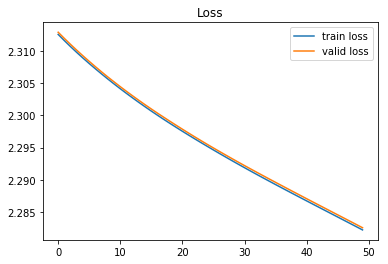

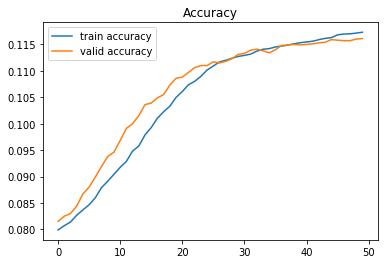

In [33]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [34]:
model_name = 'SGD' 
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model. 
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at C:\Users\1709091\Documents\GitHub\2nd-ML100Days\homework\saved_models\SGD 
10000/10000 [==============================] - 5s 513us/step
Test loss: 2.282527448272705
Test accuracy: 0.1161


In [ ]:
# Adagrad
# Test loss: 2.0508104572296144
# Test accuracy: 0.3032

# SGD
# Test loss: 2.2290771209716795
# Test accuracy: 0.2089